# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
fifa = pd.read_csv('fifa.csv')
fifa.shape

(18207, 20)

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
ValueNumeric = [(float(s.strip('M, €'))*1000) if 'M' in s else float(s.strip('K, €')) for s in fifa.Value] 
#we have now values expressed in thousands of euros. I multiplied by 1000 since we had both millions and thousands in the Value column

In [5]:
fifa['ValueNumeric'] = ValueNumeric

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
fifa = fifa.rename(columns = {'Preferred Foot':'Preferred_Foot'})
model = ols('ValueNumeric ~ C(Position) + C(Preferred_Foot)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Position),1.657002e+10,26.0,20.885022,1.634952e-96
C(Preferred_Foot),2.341622e+08,1.0,7.673655,5.608990e-03
Residual,5.529029e+11,18119.0,NaN,NaN


In [8]:
#both pvalues are smaller than 0.05, therefore we reject the null hypothesis. Both position and foot impact the value. 

What is your conclusion from this ANOVA?

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
model = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+10,163.0,6.762478,4.840477e-134
Residual,5.370951e+11,18043.0,NaN,NaN


In [10]:
#the pvalue is so small, we reject the null hypothesis that a player from either nationality has a similar value. In this case, nationality does matter. 

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
fifa_new = fifa.dropna()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [19]:
X = sm.add_constant(fifa_new[['Stamina', 'SprintSpeed']]) # We must add the intercept using the add_constant function
Y = fifa_new.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          8.04e-193
Time:                        17:17:13   Log-Likelihood:            -1.7972e+05
No. Observations:               17918   AIC:                         3.595e+05
Df Residuals:                   17915   BIC:                         3.595e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3070.0269    196.798    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Rsquared is low. only 4.8% of data is explained by our model. Linear regression is not a good model for predicting the relationship between stamina+speed and player's value. F score is high, so we reject the null hypothesis. Coefficients ARE significant. 

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [31]:
X = sm.add_constant(fifa_new.Potential) # We must add the intercept using the add_constant function
Y = fifa_new.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:46:47   Log-Likelihood:            -1.7650e+05
No. Observations:               17918   AIC:                         3.530e+05
Df Residuals:                   17916   BIC:                         3.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+04    399.569    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Slightly better predictions in this model than in the previous one, but still low. Only 33.6% of data is explained by our model. F score is high, so we reject the null hypothesis. Coefficient are significant here.  

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

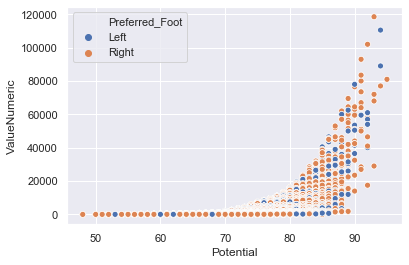

In [26]:
import seaborn as sns; sns.set()
ax = sns.scatterplot(x="Potential", y="ValueNumeric", hue="Preferred_Foot", data=fifa)

In [27]:
# I do not see linear relationship between the potential and value. I see exponential one. 